In [1]:
# To enable autcomplete
%config IPCompleter.greedy=True

In [2]:
import datetime # to get current date and time
import pandas as pd
import numpy as np
import scipy.stats as stat
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from twitterscraper import query_tweets

%matplotlib inline

# Raw state csv pulled from New York Times Github
url1 = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
states= pd.read_csv(url1)

# Raw county csv pulled from New York Times Github
url2 = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
county = pd.read_csv(url2)

INFO: {'User-Agent': 'Opera/9.80 (X11; Linux i686; Ubuntu/14.10) Presto/2.12.388 Version/12.16'}


In [3]:
states

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
2660,2020-04-19,Virginia,51,8537,277
2661,2020-04-19,Washington,53,11805,637
2662,2020-04-19,West Virginia,54,890,20
2663,2020-04-19,Wisconsin,55,4346,222


In [4]:
# Isolate state data for New Jersey

# loc isolates data based on labels, save as new dataframe
nj = states.loc[states['state'] == "New Jersey"]
nj

,date,state,fips,cases,deaths
292,2020-03-04,New Jersey,34,1,0
312,2020-03-05,New Jersey,34,2,0
337,2020-03-06,New Jersey,34,4,0
368,2020-03-07,New Jersey,34,4,0
403,2020-03-08,New Jersey,34,6,0
439,2020-03-09,New Jersey,34,11,0
477,2020-03-10,New Jersey,34,15,1
519,2020-03-11,New Jersey,34,23,1
566,2020-03-12,New Jersey,34,29,1
616,2020-03-13,New Jersey,34,50,1


In [5]:
# Determine days of outbreak

totalDays = nj.shape[0] # get number of rows containing NJ
njLength = np.linspace(1,totalDays,totalDays)
njCases = np.array(nj["cases"])

In [6]:
# Get current date and time

# now method returns date and time
now = datetime.datetime.now()
# I returns hour in 12 hour format, p returns AM or PM based on time
dateAndTime = now.strftime("%m/%d/%Y %I:%M %p")

In [7]:
# Get last date of available data
recentDate = county.at[county.index[-1], 'date']

# Isolate NJ Counties for given date
njCountyList = county[(county['state'] == "New Jersey") & (county["date"] == recentDate)]

njCountyList

,date,county,state,fips,cases,deaths
71779,2020-04-19,Atlantic,New Jersey,34001.0,398,19
71780,2020-04-19,Bergen,New Jersey,34003.0,12639,767
71781,2020-04-19,Burlington,New Jersey,34005.0,1587,58
71782,2020-04-19,Camden,New Jersey,34007.0,2131,74
71783,2020-04-19,Cape May,New Jersey,34009.0,206,14
71784,2020-04-19,Cumberland,New Jersey,34011.0,308,4
71785,2020-04-19,Essex,New Jersey,34013.0,10304,740
71786,2020-04-19,Gloucester,New Jersey,34015.0,737,24
71787,2020-04-19,Hudson,New Jersey,34017.0,10486,452
71788,2020-04-19,Hunterdon,New Jersey,34019.0,407,18


last updated at: 04/20/2020 08:39 PM


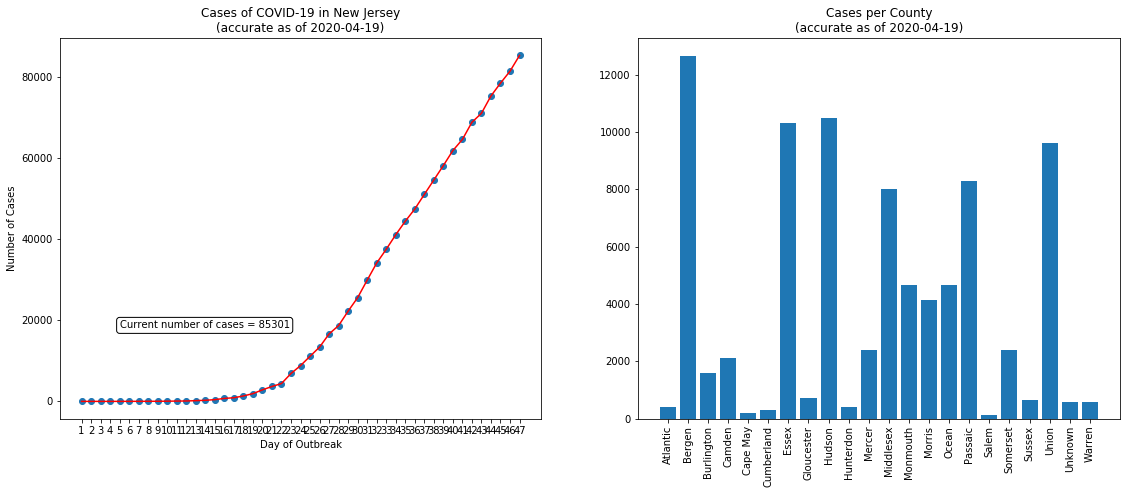

In [8]:

# Create figure object with two subplots oriented horizontally

figure, (sc, ba) = plt.subplots(1,2, figsize=(19,7))

# Plot NJ cases vs time

sc.scatter(njLength, njCases)
sc.plot(njLength, njCases, color = 'r')
sTitle = "Cases of COVID-19 in New Jersey\n(accurate as of " + recentDate + ")"
sc.set_title(sTitle)
sc.set_xlabel("Day of Outbreak")
sc.set_ylabel("Number of Cases")

# adjust ticks to show all days
xticks = np.arange(1,njLength.max()+1,1)
sc.set_xticks(xticks); # semicolon suppresses output of this function

# Create box label
labelText = "Current number of cases = " + str(njCases.max())
box = dict(boxstyle = 'round', facecolor = 'white')
sc.text(5, 18000,labelText,bbox=box);

# Plot cases per county

ba.bar(njCountyList['county'], njCountyList['cases'] )

bTitle = "Cases per County\n(accurate as of " + recentDate + ")"
ba.set_xticklabels(njCountyList['county'], rotation = 90);
ba.set_title(bTitle);

print("last updated at: {}".format(dateAndTime))

last updated at: 04/20/2020 08:39 PM


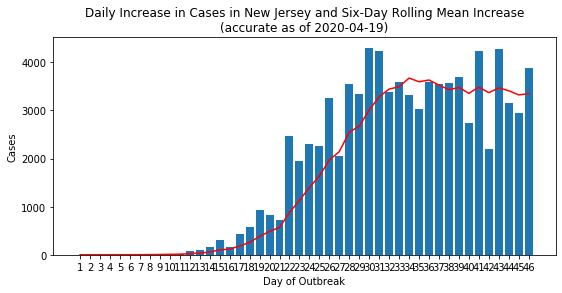

In [9]:
# Create list of the increase in cases between each day and rate of change

newCases = []

for i in range(0, len(njCases)-1):
    newCases.append(njCases[i+1]-njCases[i]) # subtract current number of cases by previous number

newCases = np.array(newCases) # convert case number list to array

numDaysExceptLast = len(njLength) # need to remove last day from list

newCaseDays = np.arange(1, numDaysExceptLast) # convert day list to array

ticks = np.arange(1,newCaseDays.max()+1,1); #generate x ticks

fig= plt.figure(figsize=(9,4)) # create figure

axes = fig.add_subplot() # automatically adds axis (graph) in default position
axes.bar(newCaseDays, newCases.transpose())
axes.set_title("Daily Increase in Cases in New Jersey and Six-Day Rolling Mean Increase\n(accurate as of "
               + recentDate + ")");
axes.set_xticks(ticks);
axes.set_xlabel("Day of Outbreak");
axes.set_ylabel("Cases");
print("last updated at: {}".format(dateAndTime))

'''
Adding line tracing 6 day rolling average increase in cases

Because data can be unreliable at any given day, a rolling average allows for 
visualization of trends over a longer period of time, which is more reliable.

At each day in the tracker, the mean is taken of the daily increases over the previous 6 days. 
For days 1-6, there are not 6 days worth of data, so the average is taken with all days up until that point.
After day 6, the starting variable increases by 1 to trail 6 days behind the current day's data, leaving 6 days in
between to calculate the average.
'''
meanCaseIncrease = []

sixDayStart = 0
for i in range(len(newCases)):
    if i > 6: # trail by 6 days once 6 days of data are available. Change number to alter number of days for average
        sixDayStart+=1
    # mean of previous 6 days, i+1 to avoid taking mean of empty space after last day of data
    meanCaseIncrease.append(np.mean(newCases[sixDayStart:i+1])); 
    
plt.plot(newCaseDays, meanCaseIncrease, color = 'r');

COVID-19 Hospitalizations in New Jersey:<br>Unlike case numbers, there is no direct source for all of the hospitalizations in New Jersey. However, the Governor of New Jersey started reporting hospitalizations almost every day (with some exceptions) from April 9th on his Twitter account, @GovMurphy. While the data from this account is incomplete, it is the only place reporting these values. The following code scrapes Twitter for the governor's tweets relating to hospitalization rates, parses each tweet for the correct number of hospitalizations, and then plots the values.

In [10]:
# Create Date Objects for start and end of data
startDate = datetime.date(2020, 4, 8)
endDate = datetime.date.today() + datetime.timedelta(days=1) # have to use tomorrow's date to include tweets from today

print(startDate)
print(endDate)
limit = 10000 # max number of tweets that will be grabbed
lang = 'english'
#username = GovMurphy

# scrape all tweets referencing the governor and COVID hospitalizations, using these parameters 
tweets = query_tweets("Phil Murphy hospitalized", begindate = startDate, enddate = endDate, limit = limit, lang = lang)

2020-04-08
2020-04-21


INFO: queries: ['Phil Murphy hospitalized since:2020-04-08 until:2020-04-09', 'Phil Murphy hospitalized since:2020-04-09 until:2020-04-10', 'Phil Murphy hospitalized since:2020-04-10 until:2020-04-11', 'Phil Murphy hospitalized since:2020-04-11 until:2020-04-12', 'Phil Murphy hospitalized since:2020-04-12 until:2020-04-13', 'Phil Murphy hospitalized since:2020-04-13 until:2020-04-14', 'Phil Murphy hospitalized since:2020-04-14 until:2020-04-15', 'Phil Murphy hospitalized since:2020-04-15 until:2020-04-16', 'Phil Murphy hospitalized since:2020-04-16 until:2020-04-17', 'Phil Murphy hospitalized since:2020-04-17 until:2020-04-18', 'Phil Murphy hospitalized since:2020-04-18 until:2020-04-19', 'Phil Murphy hospitalized since:2020-04-19 until:2020-04-20', 'Phil Murphy hospitalized since:2020-04-20 until:2020-04-21']
INFO: Got 26 tweets (26 new).
INFO: Got 46 tweets (20 new).
INFO: Got 76 tweets (30 new).
INFO: Got 92 tweets (16 new).
INFO: Got 108 tweets (16 new).
INFO: Got 128 tweets (20 ne

In [11]:
# convert tweet data to pandas dataframe
tweetData = pd.DataFrame(t.__dict__ for t in tweets)
tweetData

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,MikeFrancis_11,Michael,931027162089615362,1249095995654356997,/MikeFrancis_11/status/1249095995654356997,2020-04-11 22:04:27,1586642667,"I understand, but look at the numbers. The dea...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],,2,1,4,True,True,1249072130425335811,"[{'screen_name': 'markffkram', 'user_id': '836..."
1,rennie5678,Renee,3378314974,1249063556676550656,/rennie5678/status/1249063556676550656,2020-04-11 19:55:33,1586634933,How many patients are actually at these statio...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],,1,0,1,True,True,1249025369249906691,"[{'screen_name': 'GovMurphy', 'user_id': '9489..."
2,NJDeptofHealth,NJDOH,252114970,1249034214051282950,/NJDeptofHealth/status/1249034214051282950,2020-04-11 17:58:57,1586627937,COVID-19 UPDATE @GovMurphy expanding the requi...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],,142,75,13,True,False,,[]
3,AllBRKNews,All Breaking News,921842109082083328,1249026991149514753,/AllBRKNews/status/1249026991149514753,2020-04-11 17:30:15,1586626215,New Jersey Governor Phil Murphy is giving an u...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],,0,0,0,False,False,,[]
4,suzfrmthesix,S.U.Z,1029117016739856391,1249024154147356672,/suzfrmthesix/status/1249024154147356672,2020-04-11 17:18:58,1586625538,@GovMurphy just said yeah wearing a mask every...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],,0,0,0,False,False,,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,GovMurphy,Governor Phil Murphy,948946378939609089,1249775905083404290,/GovMurphy/status/1249775905083404290,2020-04-13 19:06:10,1586804770,"As of 10:00 PM last night, 7,781 residents wer...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],,150,60,19,True,False,,[]
274,rennie5678,Renee,3378314974,1249766898117554177,/rennie5678/status/1249766898117554177,2020-04-13 18:30:22,1586802622,1) # of people hospitalized for COVID?\n2) # o...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],,0,0,0,False,True,1249754678373617666,"[{'screen_name': 'GovMurphy', 'user_id': '9489..."
275,rennie5678,Renee,3378314974,1249731450645229568,/rennie5678/status/1249731450645229568,2020-04-13 16:09:31,1586794171,1) # of people hospitalized for COVID?\n2) # o...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],,3,0,0,False,True,1249705786659520512,"[{'screen_name': 'GovMurphy', 'user_id': '9489..."
276,mrsmnm2016,maryannnicole,1206701708665118720,1249715758336053248,/mrsmnm2016/status/1249715758336053248,2020-04-13 15:07:10,1586790430,"Oyygen, hydroxychoroquine, high dose vitamin c...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],,2,1,3,True,True,1249707496995991559,"[{'screen_name': 'andreah97530617', 'user_id':..."


In [12]:
# Isolate tweets by Governor Murphy (user providing data)
tweetData = tweetData.loc[tweetData['username'] == "Governor Phil Murphy"]

# sort from earliest to most recent
tweetData = tweetData.sort_values(by=['timestamp_epochs']) # timestamp_epochs store number that increases with each tweet

# Isolate text from tweets
tweetText = tweetData["text"]
tweetText = tweetText.reset_index()
tweetText = tweetText['text']

tweetText

0     7,363 residents are hospitalized. 1,523 of the...
1     7,363 residents are hospitalized. 1,523 of the...
2     As of 10:00 PM last night, 7,570 residents wer...
3     As of 10:00 PM last night, 7,570 residents wer...
4     As of 10:00 PM last night, 7,618 New Jerseyans...
5     As of 10:00 PM last night, 7,618 New Jerseyans...
6     As of 10:00 PM last night, 7,781 residents wer...
7     As of 10:00 PM last night, 7,781 residents wer...
8     As of 10:00 PM last night, 8,270 residents wer...
9     As of 10:00 PM last night, 8,270 residents wer...
10    As of 10:00 PM last night, 8,224 residents wer...
11    As of 10:00 PM last night, 8,224 residents wer...
12    As of 10:00 PM last night:\n•8,011 residents r...
13    As of 10:00 PM last night:\n•8,011 residents r...
14    As of 10:00 PM last night:\n•7,718 residents r...
15    As of 10:00 PM last night:\n•7,718 residents r...
16    Stats:\n•6,986 #COVID19 patients reported hosp...
17    Stats:\n•6,986 #COVID19 patients reported 

In [13]:

def hospitalizationExtraction(dataframe, indexOfTweet):
  
    """
    Parses tweet for the number of hospitalized patients.
    
    Given a dataframe and the index of the tweet in the dataframe, finds where the word 'hospitalized'
    is in that tweet. Then it loops in reverse from that word to the beginning of the tweet until it finds a "word"
    which is a numerical value (the closest number before "hospitalizations" will be the probably be number of 
    hospitalized people, since that is how the sentences are written).
    However, if the first numerical characters are not the correct number, it will keep looking until it finds it.
    It then stores each character of the number in a list, then joins to string, then returns as int
    """
    
    wordsInTweet = dataframe[indexOfTweet].split() # split tweet into list of words

    # find index of "hospitalized", trying different splits with punctuation
    try:
        hospFound = wordsInTweet.index("hospitalized") # find 'hospitalized' in tweet 
    except ValueError:
        try: 
            hospFound = wordsInTweet.index("hospitalized.") # find 'hospitalized.' in tweet
        except ValueError:
            hospFound = wordsInTweet.index("hospitalized,") # find 'hospitalized.' in tweet
            
    digits = []
    
    # keep track of length of number (digits)
    lengthOfNumber = 0 
    
    # loop from "hospitalizations" to the beginning of the list until the correct number is found
    
    for word in range(hospFound,-1,-1): # loop through words (from -1 to include 0)
  
        for char in wordsInTweet[word]: # loop through each character of each word
      
            if char.isdigit() or char == "0": 
                digits.append(char) # add to list of digits
                lengthOfNumber+=1  
                
        if lengthOfNumber >= 3: # if the number has 3 or more digits, it is most likely correct, so break loop
            break
            
        # if the number is 2 digits or less, it is probably wrong. In this case, disregard these and continue loop
        else: 
            digits = []

    number = ""
    
    try:
        number = int(number.join(digits)) # combine digits into one string and convert to int
        return number
    except:
        return None # if the tweet is not in the proper format (no valid numbers or otherwise), return none

hospitalizationExtraction(tweetText,3) # test


7570

In [14]:
# generate list of rows from dataframe, tells how many tweets there are to search
hospDayCount = [i for i in range(tweetData.shape[0])]

# return hospitalization numbers from all tweets
hospitalized = [hospitalizationExtraction(tweetText,i) for i in hospDayCount]
print(hospitalized)

# remove none values from invalid tweets
hospitalized = [i for i in hospitalized if i != None]

print(hospitalized)

# list contains duplicate values since some of his tweets are duplicated
# convert list to dictionary using list values as keys (removes duplicates), then convert back to list
hospitalized = list(dict.fromkeys(hospitalized))

hospDayCount = [i for i in range(1, len(hospitalized)+1)]
print(hospitalized)
print(hospDayCount)

[7363, 7363, 7570, 7570, 7618, 7618, 7781, 7781, 8270, 8270, 8224, 8224, 8011, 8011, 7718, 7718, 6986, 6986, None, None]
[7363, 7363, 7570, 7570, 7618, 7618, 7781, 7781, 8270, 8270, 8224, 8224, 8011, 8011, 7718, 7718, 6986, 6986]
[7363, 7570, 7618, 7781, 8270, 8224, 8011, 7718, 6986]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


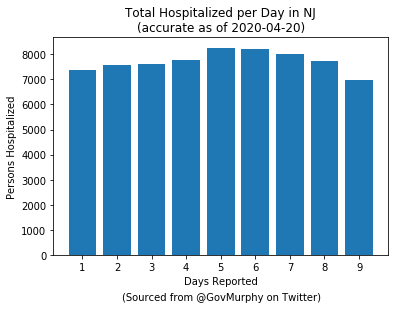

In [17]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(hospDayCount,hospitalized)
ax.set_title("Total Hospitalized per Day in NJ\n(accurate as of {})".format(datetime.date.today()))
ax.set_ylabel('Persons Hospitalized')
ax.set_xlabel('Days Reported')
ax.set_xticks(hospDayCount);
ax.text(2.15,-1800,"(Sourced from @GovMurphy on Twitter)");